# Python 常用库

## [Numpy](https://www.numpy.org)

## [SciPy](https://www.scipy.org)

## [Matplotlib](https://matplotlib.org)

## [Scikit-learn](https://scikit-learn.org)

## [Pandas](https://pandas.pydata.org)

## Anaconda(https://www.anaconda.com/)

# 机器学习综述

## 图灵测试

Alan Mathison Turing: [《Computing Machinery and Intelligence》](https://courses.edx.org/asset-v1:MITx+24.09x+3T2015+type@asset+block/5_turing_computing_machinery_and_intelligence.pdf)
如果通过问答这种方式，我们已经无法区分对话那端到底是机器还是人类，那么就可以说这样的机器已经具备人工智能。

## 机器学习理论

Tom Mitchell：*A computer program is said to learn from experience **E** with respect to some class of tasks **T** and performance measure **P**, if its performance at tasks in **T**, as measured by **P**, improves with experience **E**.* 
如果一个程序在使用既有的经验（E）执行某类任务（T）的过程中被认定为是“具有学习能力的”，那么它一定需要展现出：利用现有的经验（E），不断改善完成既定任务（T）的性能（P）的特质。

# 良性/恶性乳腺癌肿瘤预测

In [0]:
import pandas as pd

In [0]:
df_train = pd.read_csv('./breast-cancer-train.csv')
df_test = pd.read_csv('./breast-cancer-test.csv')

In [0]:
df_train.head()

,Unnamed: 0,Clump Thickness,Cell Size,Type
0,163,1,1,0
1,286,10,10,1
2,612,10,10,1
3,517,1,1,0
4,464,1,1,0


In [0]:
df_test_negative = df_test.loc[df_test['Type'] == 0][['Clump Thickness', 'Cell Size']]
df_test_positive = df_test.loc[df_test['Type'] == 1][['Clump Thickness', 'Cell Size']]

In [0]:
df_test_negative.head()

,Clump Thickness,Cell Size
0,1,2
1,1,1
2,1,1
4,1,1
5,1,1


In [0]:
df_test_positive.head()

,Clump Thickness,Cell Size
3,5,5
7,6,6
8,4,10
9,3,3
11,10,3


In [0]:
import matplotlib.pyplot as plt

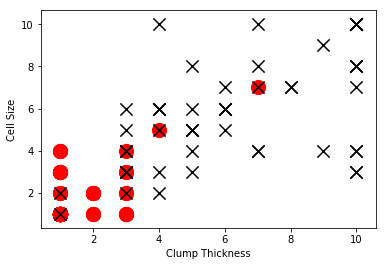

In [0]:
plt.scatter(df_test_negative['Clump Thickness'], df_test_negative['Cell Size'], marker='o', s=200, c='red')
plt.scatter(df_test_positive['Clump Thickness'], df_test_positive['Cell Size'], marker='x', s=150, c='black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.show()

In [0]:
import numpy as np

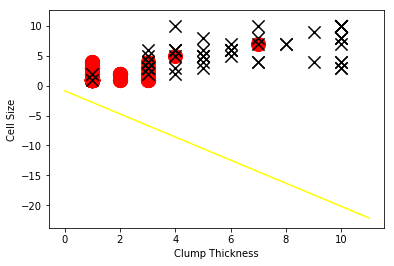

In [0]:
intercept = np.random.random([1])
coef = np.random.random([2])
lx = np.arange(0, 12)
ly = (-intercept - lx * coef[0]) / coef[1]
plt.plot(lx, ly, c='yellow')

plt.scatter(df_test_negative['Clump Thickness'],df_test_negative['Cell Size'], marker = 'o', s=200, c='red')
plt.scatter(df_test_positive['Clump Thickness'],df_test_positive['Cell Size'], marker = 'x', s=150, c='black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.show()

In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [0]:
lr.fit(df_train[['Clump Thickness', 'Cell Size']][:10], df_train['Type'][:10])
print('Testing accuracy(10 training samples):', lr.score(df_test[['Clump Thickness', 'Cell Size']], df_test['Type']))

Testing accuracy(10 training samples): 0.8685714285714285


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


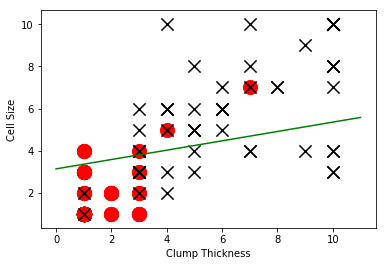

In [0]:
intercept = lr.intercept_
coef = lr.coef_[0, :]

ly = (-intercept - lx * coef[0]) / coef[1]

plt.plot(lx, ly, c='green')
plt.scatter(df_test_negative['Clump Thickness'],df_test_negative['Cell Size'], marker = 'o', s=200, c='red')
plt.scatter(df_test_positive['Clump Thickness'],df_test_positive['Cell Size'], marker = 'x', s=150, c='black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.show()

In [0]:
lr = LogisticRegression()

lr.fit(df_train[['Clump Thickness', 'Cell Size']], df_train['Type'])
print('Testing accuracy (all training samples):', lr.score(df_test[['Clump Thickness', 'Cell Size']], df_test['Type']))

Testing accuracy (all training samples): 0.9371428571428572


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


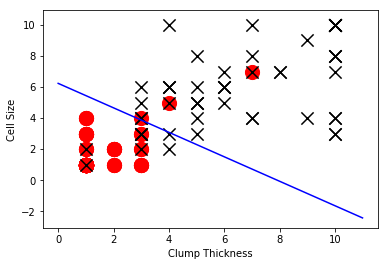

In [0]:
intercept = lr.intercept_
coef = lr.coef_[0, :]
ly = (-intercept - lx * coef[0]) / coef[1]

plt.plot(lx, ly, c='blue')
plt.scatter(df_test_negative['Clump Thickness'],df_test_negative['Cell Size'], marker = 'o', s=200, c='red')
plt.scatter(df_test_positive['Clump Thickness'],df_test_positive['Cell Size'], marker = 'x', s=150, c='black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.show()

# 分类学习

## 线性分类器

In [0]:
import numpy as np
import pandas as pd

In [0]:
column_names = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

In [0]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', names=column_names)

In [0]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [0]:
data = data.replace(to_replace='?', value=np.nan)
data = data.dropna(how='any')
data.shape

(683, 11)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[column_names[1:10]], data[column_names[10]], test_size=0.25, random_state=33)

In [0]:
y_train.value_counts()

2    344
4    168
Name: Class, dtype: int64

In [0]:
y_test.value_counts()

2    100
4     71
Name: Class, dtype: int64

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [0]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


### Logistic Regression

In [0]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_y_predict = lr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


### SGDClassifier（Stochastic Gradient Ascend）随机梯度上升算法

In [0]:
sgdc = SGDClassifier()
sgdc.fit(X_train, y_train)
sgdc_y_predict = sgdc.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


### Logistic Regression 四个指标

In [0]:
from sklearn.metrics import classification_report

print('Accuracy of LR Classifier:', lr.score(X_test, y_test))
print(classification_report(y_test, lr_y_predict, target_names=['Benign', 'Malignant']))

Accuracy of LR Classifier: 0.9883040935672515
              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99       100
   Malignant       0.99      0.99      0.99        71

   micro avg       0.99      0.99      0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



### SGDClassifier 四个指标

In [0]:
print('Accuracy of SGD Classifier:', sgdc.score(X_test, y_test))
print(classification_report(y_test, sgdc_y_predict, target_names=['Benign', 'Malignant']))

Accuracy of SGD Classifier: 0.9707602339181286
              precision    recall  f1-score   support

      Benign       0.98      0.97      0.97       100
   Malignant       0.96      0.97      0.97        71

   micro avg       0.97      0.97      0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



### 总结
 Logistic Regression 相比 SGDClassifier 有着更好的性能，是因为前者中采用解析的方式精确计算 Logistic Regression 中的参数，计算时间长但模型性能略高，而后者使用梯度法估计 SGDClassifier 的参数，计算时间短但产出模型性能略低。

## 支持向量机（分类）
支持向量机分类器（Support Vector Classifier）是根据训练样本的分布搜索所有可能的线性分类器中最佳的那个。

In [0]:
from sklearn.datasets import load_digits

digits = load_digits()

digits.data.shape

(1797, 64)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=33)

In [0]:
y_train.shape

(1347,)

In [0]:
y_test.shape

(450,)

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [0]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [0]:
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
y_predict = lsvc.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
print('The Accuracy of Linear SVC is', lsvc.score(X_test, y_test))

The Accuracy of Linear SVC is 0.9533333333333334


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, target_names=digits.target_names.astype(str)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        35
           1       0.96      0.98      0.97        54
           2       0.98      1.00      0.99        44
           3       0.93      0.93      0.93        46
           4       0.97      1.00      0.99        35
           5       0.94      0.94      0.94        48
           6       0.96      0.98      0.97        51
           7       0.92      1.00      0.96        35
           8       0.98      0.84      0.91        58
           9       0.95      0.91      0.93        44

   micro avg       0.95      0.95      0.95       450
   macro avg       0.95      0.96      0.95       450
weighted avg       0.95      0.95      0.95       450



## 朴素贝叶斯
和上述两个基于线性假设的模型不同，朴素贝叶斯分类及的构造基础是贝叶斯理论。这个模型的基本数学假设是各个维度上的特征被分类的条件概率之间是相互独立的。

In [0]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups(subset='all')
print(len(news.data))
print(news.data[0])

18846
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(news.data, news.target, test_size=0.25, random_state=33)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

In [0]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_predict = mnb.predict(X_test)

In [0]:
from sklearn.metrics import classification_report

print('The accuracy of Naive Bayes Classifier is', mnb.score(X_test, y_test))
print(classification_report(y_test, y_predict, target_names=news.target_names))

The accuracy of Naive Bayes Classifier is 0.8397707979626485
                          precision    recall  f1-score   support

             alt.atheism       0.86      0.86      0.86       201
           comp.graphics       0.59      0.86      0.70       250
 comp.os.ms-windows.misc       0.89      0.10      0.17       248
comp.sys.ibm.pc.hardware       0.60      0.88      0.72       240
   comp.sys.mac.hardware       0.93      0.78      0.85       242
          comp.windows.x       0.82      0.84      0.83       263
            misc.forsale       0.91      0.70      0.79       257
               rec.autos       0.89      0.89      0.89       238
         rec.motorcycles       0.98      0.92      0.95       276
      rec.sport.baseball       0.98      0.91      0.95       251
        rec.sport.hockey       0.93      0.99      0.96       233
               sci.crypt       0.86      0.98      0.91       238
         sci.electronics       0.85      0.88      0.86       249
              

In [0]:
### 总结

### 总结
由于朴素贝叶斯模型较强的特征条件独立假设，是的模型预测所需要估计的参数规模从幂指数量级向线性量级减少，极大地节约了内存消耗和计算时间。但是，也正是受这种强假设的限制，模型训练时无法将各个特征之间的联系考量在内。

## K 近邻（分类）

In [0]:
from sklearn.datasets import load_iris

iris = load_iris()

iris.data.shape

(150, 4)

In [0]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=33)

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [0]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
y_predict = knc.predict(X_test)

In [0]:
print('The accuracy of K-Nearest Neighbor Classifier is ', knc.score(X_test, y_test))

The accuracy of K-Nearest Neighbor Classifier is  0.8947368421052632


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.73      1.00      0.85        11
   virginica       1.00      0.79      0.88        19

   micro avg       0.89      0.89      0.89        38
   macro avg       0.91      0.93      0.91        38
weighted avg       0.92      0.89      0.90        38



### 总结
该模型没有参数训练过程，也就是说，我们并没有通过任何学习算法分析训练数据，而只是根据测试样本在训练数据的分布直接作出分类决策。因此，K 近邻属于无参数模型（Nonparametric model）的一种。该模型每处理一个测试样本，都需要对所有预先加载在内存中的训练样本进行遍历、逐一计算相似度、排序并且选取 K 个最邻近训练样本的标记，进而作出分类决策，这是平方级别的算法复杂度，导致了其非常高的内存消耗。（了解 KD-Tree 数据结构用空间换取时间）

## 决策树
前面所使用的逻辑斯蒂回归和支持向量机模型都在某种程度上要求被学习的数据特征和目标之间遵照线性假设，然而在许多现实场景下，这种假设是不存在的。

### 信息熵（Information Gain）

### 基尼不纯性（Gini Impurity）决策树模型默认配置

In [0]:
import pandas as pd

titanic = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt')

In [0]:
titanic.head()

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


In [0]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
row.names    1313 non-null int64
pclass       1313 non-null object
survived     1313 non-null int64
name         1313 non-null object
age          633 non-null float64
embarked     821 non-null object
home.dest    754 non-null object
room         77 non-null object
ticket       69 non-null object
boat         347 non-null object
sex          1313 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 112.9+ KB


In [0]:
X = titanic[['pclass', 'age', 'sex']]
y = titanic['survived']

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 3 columns):
pclass    1313 non-null object
age       633 non-null float64
sex       1313 non-null object
dtypes: float64(1), object(2)
memory usage: 30.9+ KB


In [0]:
X['age'].fillna(X['age'].mean(), inplace=True)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 3 columns):
pclass    1313 non-null object
age       1313 non-null float64
sex       1313 non-null object
dtypes: float64(1), object(2)
memory usage: 30.9+ KB


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

In [0]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse=False)

In [0]:
X_train = vec.fit_transform(X_train.to_dict(orient='record'))
print(vec.feature_names_)

['age', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'sex=female', 'sex=male']


In [0]:
X_test = vec.transform(X_test.to_dict(orient='record'))

In [0]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_predict = dtc.predict(X_test)

In [0]:
from sklearn.metrics import classification_report

print('The accuracy of Decision Tree Classifier is', dtc.score(X_test, y_test))
print(classification_report(y_predict, y_test, target_names=['died', 'survived']))

The accuracy of Decision Tree Classifier is 0.7811550151975684
              precision    recall  f1-score   support

        died       0.91      0.78      0.84       236
    survived       0.58      0.80      0.67        93

   micro avg       0.78      0.78      0.78       329
   macro avg       0.74      0.79      0.75       329
weighted avg       0.81      0.78      0.79       329



### 总结
决策树与 K 近邻模型不同，属于有参数模型。决策树的推断逻辑非常直观，具有清晰的可解释性，也方便了模型的可视化。这些特性同时也保证在使用决策树模型时，是无需考虑对数据的量化甚至标准化的。

## 集成学习（Ensemble 分类）
集成（Ensemble）分类模型便是综合考量多个分类器的预测结果，从而做出决策。只是这种“综合考量”的方式大体上分为两种：


*   一种是利用相同的训练数据同时搭建多个独立的分类模型，然后通过投票的方式，以多数服从少数的原则做出最终的分类决策。比较具有代表性的模型为随机森林分类器（Random Forest Classifier），即在相同训练数据上同时搭建多棵决策树（Decision Tree）。随机森林分类器在构建的过程中会随机选取特征而放弃固定的排序预算法。
*   另一种则是按照一定次序搭建多个分类模型，这些模型之间彼此存在依赖关系。比较具有代表性的当属梯度提升决策树（Gradient Tree Boosting）。与构建随机森林分类器模型不同，这里每一棵决策树在生成的过程中都会尽可能降低整体集成模型在训练集上的拟合误差。



In [0]:
import pandas as pd

titanic = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt')

In [0]:
X = titanic[['pclass', 'age', 'sex']]
y = titanic['survived']

In [0]:
X['age'].fillna(X['age'].mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

In [0]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse=False)

In [0]:
X_train = vec.fit_transform(X_train.to_dict(orient='record'))
X_test = vec.transform(X_test.to_dict(orient='record'))

In [0]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_y_pred = dtc.predict(X_test)

In [0]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_y_pred = rfc.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_y_pred = gbc.predict(X_test)

In [0]:
from sklearn.metrics import classification_report

print('The accuracy of decision tree is', dtc.score(X_test, y_test))
print(classification_report(dtc_y_pred, y_test))

The accuracy of decision tree is 0.7811550151975684
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       236
           1       0.58      0.80      0.67        93

   micro avg       0.78      0.78      0.78       329
   macro avg       0.74      0.79      0.75       329
weighted avg       0.81      0.78      0.79       329



In [0]:
print('The accuracy of random forest classifier is', rfc.score(X_test, y_test))
print(classification_report(rfc_y_pred, y_test))

The accuracy of random forest classifier is 0.7811550151975684
              precision    recall  f1-score   support

           0       0.90      0.78      0.83       234
           1       0.59      0.79      0.68        95

   micro avg       0.78      0.78      0.78       329
   macro avg       0.75      0.78      0.76       329
weighted avg       0.81      0.78      0.79       329



In [0]:
print('The accuracy of gradient tree boosting is', gbc.score(X_test, y_test))
print(classification_report(gbc_y_pred, y_test))

The accuracy of gradient tree boosting is 0.790273556231003
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       239
           1       0.58      0.82      0.68        90

   micro avg       0.79      0.79      0.79       329
   macro avg       0.75      0.80      0.76       329
weighted avg       0.83      0.79      0.80       329



### 总结
工业界经常使用随机森林分类模型作为基线系统（Baseline System）。
集成模型可以整合多种模型，或者多次就一种类型的模型建模。由于模型估计参数的过程中也同样受到概率的影响，具有一定的不确定性。集成模型虽然在训练过程中要耗费更多的时间，但是得到的综合模型旺旺具有更高的表现性能和更好的稳定性。

# 回归预测

### 线性回归器

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
from sklearn.model_selection import train_test_split
import numpy as np

In [0]:
X = boston.data
y = boston.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(379, 13) (379,)
(127, 13) (127,)


In [5]:
print("The max target value is", np.max(boston.target))
print("The min target value is", np.min(boston.target))
print("The average target value is", np.mean(boston.target))

The max target value is 50.0
The min target value is 5.0
The average target value is 22.532806324110677


In [0]:
from sklearn.preprocessing import StandardScaler

ss_X = StandardScaler()
ss_y = StandardScaler()

X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

y_train = ss_y.fit_transform(y_train.reshape(-1, 1))
y_test = ss_y.transform(y_test.reshape(-1, 1))


In [0]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_y_predict = lr.predict(X_test)

In [8]:
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor()
sgdr.fit(X_train, y_train)
sgdr_y_predict = sgdr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### LinearRegression

In [9]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print('The Value of default measurement of LinearRegression is', lr.score(X_test, y_test))
print('The Value of R-squared of LinearRegression is', r2_score(y_test, lr_y_predict))
print('The Value of mean squared error of LinearRegression is', mean_squared_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(lr_y_predict)))
print('The Value of mean absolute error of LinearRegression is', mean_absolute_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(lr_y_predict)))

The Value of default measurement of LinearRegression is 0.6757955014529481
The Value of R-squared of LinearRegression is 0.6757955014529481
The Value of mean squared error of LinearRegression is 25.139236520353453
The Value of mean absolute error of LinearRegression is 3.532532543705398


### SGDRegressor（Stochastic Gradient Descend）随机梯度下降算法

In [10]:
print('The Value of default measurement of SGDRegressor is', sgdr.score(X_test, y_test))
print('The Value of R-squared of SGDRegressor  is', r2_score(y_test, sgdr_y_predict))
print('The Value of mean squared error of SGDRegressor  is', mean_squared_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(sgdr_y_predict)))
print('The Value of mean absolute error of SGDRegressor  is', mean_absolute_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(sgdr_y_predict)))

The Value of default measurement of SGDRegressor is 0.659533029364655
The Value of R-squared of SGDRegressor  is 0.6595330293646551
The Value of mean squared error of SGDRegressor  is 26.400249658867676
The Value of mean absolute error of SGDRegressor  is 3.4957748622203217


### 总结
同样地，两种分类器性能上存在差异。根据 Scikit-learn 官网的建议，如果数据规模超过 10 万，推荐使用随机梯度法估计参数模型（SGD Classifier/Regressor）。

## 支持向量机（回归）
该模型可以通过配置不同的核函数来改变模型性能，核函数是一项非常有用的特征映射技巧，通过某种函数计算，将原有的特征映射到更高维的空间，从而尽可能达到新的高维度特征线性可分的程度，结合支持向量机的特点，这种高维度线性可分的数据特征恰好可以发挥其模型优势。

### 线性核函数

In [11]:
from sklearn.svm import SVR

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)
linear_svr_y_predict = linear_svr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 多项式核函数

In [12]:
poly_svr = SVR(kernel='poly')
poly_svr.fit(X_train, y_train)
poly_svr_y_predict = poly_svr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 径向基核函数（Radial basis function）

In [13]:
rbf_svr = SVR(kernel = 'rbf')
rbf_svr.fit(X_train, y_train)
rbf_svr_y_predict = rbf_svr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 性能测试对比

In [0]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [15]:
print('The Value of default measurement of Linear SVR is', linear_svr.score(X_test, y_test))
print('The Value of R-squared of Linear SVR is', r2_score(y_test, linear_svr_y_predict))
print('The Value of mean squared error of Linear SVR  is', mean_squared_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(linear_svr_y_predict)))
print('The Value of mean absolute error of Linear SVR  is', mean_absolute_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(linear_svr_y_predict)))

The Value of default measurement of Linear SVR is 0.650659546421538
The Value of R-squared of Linear SVR is 0.650659546421538
The Value of mean squared error of Linear SVR  is 27.088311013556027
The Value of mean absolute error of Linear SVR  is 3.4328013877599624


In [16]:
print('The Value of default measurement of Poly SVR is', poly_svr.score(X_test, y_test))
print('The Value of R-squared of Poly SVR is', r2_score(y_test, poly_svr_y_predict))
print('The Value of mean squared error of Poly SVR  is', mean_squared_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(poly_svr_y_predict)))
print('The Value of mean absolute error of Poly SVR  is', mean_absolute_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(poly_svr_y_predict)))

The Value of default measurement of Poly SVR is 0.40365065102550846
The Value of R-squared of Poly SVR is 0.40365065102550846
The Value of mean squared error of Poly SVR  is 46.24170053103929
The Value of mean absolute error of Poly SVR  is 3.73840737104651


In [17]:
print('The Value of default measurement of RBF SVR is', rbf_svr.score(X_test, y_test))
print('The Value of R-squared of RBF SVR is', r2_score(y_test, rbf_svr_y_predict))
print('The Value of mean squared error of RBF SVR  is', mean_squared_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(rbf_svr_y_predict)))
print('The Value of mean absolute error of RBF SVR  is', mean_absolute_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(rbf_svr_y_predict)))

The Value of default measurement of RBF SVR is 0.7559887416340944
The Value of R-squared of RBF SVR is 0.7559887416340944
The Value of mean squared error of RBF SVR  is 18.920948861538733
The Value of mean absolute error of RBF SVR  is 2.6067819999501114


## K 近邻（回归）

### 平均回归

In [0]:
from sklearn.neighbors import KNeighborsRegressor

uni_knr = KNeighborsRegressor(weights='uniform')
uni_knr.fit(X_train, y_train)
uni_knr_y_predict = uni_knr.predict(X_test)

### 根据距离加权回归

In [0]:
dis_knr = KNeighborsRegressor(weights='distance')
dis_knr.fit(X_train, y_train)
dis_knr_y_predict = dis_knr.predict(X_test)

### 性能测试对比

In [20]:
print('The Value of default measurement of uniform-weighted KNeighborsRegressor is', uni_knr.score(X_test, y_test))
print('The Value of R-squared of uniform-weighted KNeighborsRegressorR is', r2_score(y_test, uni_knr_y_predict))
print('The Value of mean squared error of uniform-weighted KNeighborsRegressor  is', mean_squared_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(uni_knr_y_predict)))
print('The Value of mean absolute error of uniform-weighted KNeighborsRegressor  is', mean_absolute_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(uni_knr_y_predict)))

The Value of default measurement of uniform-weighted KNeighborsRegressor is 0.6907212176346006
The Value of R-squared of uniform-weighted KNeighborsRegressorR is 0.6907212176346006
The Value of mean squared error of uniform-weighted KNeighborsRegressor  is 23.981877165354337
The Value of mean absolute error of uniform-weighted KNeighborsRegressor  is 2.9650393700787396


In [21]:
print('The Value of default measurement of distance-weighted KNeighborsRegressor is', dis_knr.score(X_test, y_test))
print('The Value of R-squared of distance-weighted KNeighborsRegressorR is', r2_score(y_test, dis_knr_y_predict))
print('The Value of mean squared error of distance-weighted KNeighborsRegressor  is', mean_squared_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(dis_knr_y_predict)))
print('The Value of mean absolute error of distance-weighted KNeighborsRegressor  is', mean_absolute_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(dis_knr_y_predict)))

The Value of default measurement of distance-weighted KNeighborsRegressor is 0.7201094821421603
The Value of R-squared of distance-weighted KNeighborsRegressorR is 0.7201094821421603
The Value of mean squared error of distance-weighted KNeighborsRegressor  is 21.703073090490353
The Value of mean absolute error of distance-weighted KNeighborsRegressor  is 2.801125502210876


## 回归树

In [0]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_y_predict = dtr.predict(X_test)

In [23]:
print('The Value of default measurement of DecisionTreeRegressor is', dtr.score(X_test, y_test))
print('The Value of R-squared of DecisionTreeRegressor is', r2_score(y_test, dtr_y_predict))
print('The Value of mean squared error of DecisionTreeRegressor is', mean_squared_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(dtr_y_predict)))
print('The Value of mean absolute error of DecisionTreeRegressor is', mean_absolute_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(dtr_y_predict)))

The Value of default measurement of DecisionTreeRegressor is 0.7081098086540525
The Value of R-squared of DecisionTreeRegressor is 0.7081098086540525
The Value of mean squared error of DecisionTreeRegressor is 22.63354330708662
The Value of mean absolute error of DecisionTreeRegressor is 3.0251968503937006


### 总结
这类树模型的优点：①树模型可以解决非线性特征的问题；②树模型不要求对特征标准化和统一量化，即数值型和类别型特征都可以直接被应用在树模型的构建和预测过程中；③因为上述原因，树模型也可以直观地输出决策过程，使得预测结果具有可解释性。
这类模型的缺陷：①正是因为树模型可以解决复杂的非线性拟合问题，所以更较容易因为模型搭建过于复杂而丧失对新数据预测的精度（泛化力）；②树模型从上至下的预测流程会因为数据细微的更改而发生较大的结构变化，因此预测稳定性较差；③依托训练数据构建最佳的树模型是 NP 难问题，即在有限时间内无法找出最优解的问题，所以我们所使用了类似贪婪算法的解法只能找到一些次优解。

## 集成模型（回归）

In [0]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor

### 随机森林（Random Forests）

In [25]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_y_predict = rfr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


### 梯度提升树（Gradient Tree Boosting）

In [26]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_y_predict = gbr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 极端随机森林（Extremely Randomized Trees）
与普通的随机森林模型不同的是，极端随机森林在每当构建一棵树的分裂节点的时候，不会任意地选取特征；而是先随机搜集一部分特征，然后利用信息熵和基尼不纯性等指标挑选最佳的节点特征。

In [27]:
etr = ExtraTreesRegressor()
etr.fit(X_train, y_train)
etr_y_predict = etr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


### 性能测试

In [28]:
print('The Value of default measurement of RandomForestRegressor is', rfr.score(X_test, y_test))
print('The Value of R-squared of RandomForestRegressor is', r2_score(y_test, rfr_y_predict))
print('The Value of mean squared error of RandomForestRegressor is', mean_squared_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(rfr_y_predict)))
print('The Value of mean absolute error of RandomForestRegressor is', mean_absolute_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(rfr_y_predict)))

The Value of default measurement of RandomForestRegressor is 0.8141715987019179
The Value of R-squared of RandomForestRegressor is 0.8141715987019179
The Value of mean squared error of RandomForestRegressor is 14.409374803149609
The Value of mean absolute error of RandomForestRegressor is 2.3960629921259837


In [29]:
print('The Value of default measurement of GradientBoostingRegressor is', gbr.score(X_test, y_test))
print('The Value of R-squared of GradientBoostingRegressor is', r2_score(y_test, gbr_y_predict))
print('The Value of mean squared error of GradientBoostingRegressor is', mean_squared_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(gbr_y_predict)))
print('The Value of mean absolute error of GradientBoostingRegressor is', mean_absolute_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(gbr_y_predict)))

The Value of default measurement of GradientBoostingRegressor is 0.8361411443910923
The Value of R-squared of GradientBoostingRegressor is 0.8361411443910924
The Value of mean squared error of GradientBoostingRegressor is 12.70582778945906
The Value of mean absolute error of GradientBoostingRegressor is 2.2966026904901913


In [30]:
print('The Value of default measurement of ExtraTreesRegressor is', etr.score(X_test, y_test))
print('The Value of R-squared of ExtraTreesRegressor is', r2_score(y_test, etr_y_predict))
print('The Value of mean squared error of ExtraTreesRegressor is', mean_squared_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(etr_y_predict)))
print('The Value of mean absolute error of ExtraTreesRegressor is', mean_absolute_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(etr_y_predict)))

The Value of default measurement of ExtraTreesRegressor is 0.7754452483679184
The Value of R-squared of ExtraTreesRegressor is 0.7754452483679184
The Value of mean squared error of ExtraTreesRegressor is 17.412266141732278
The Value of mean absolute error of ExtraTreesRegressor is 2.4645669291338583


In [49]:
print(np.sort(list(zip(etr.feature_importances_, boston.feature_names)), axis=0))

[['0.00504523644799687' 'AGE']
 ['0.011918402392856655' 'B']
 ['0.014001098768433206' 'CHAS']
 ['0.021447199077873336' 'CRIM']
 ['0.02237742649679687' 'DIS']
 ['0.023191124928316393' 'INDUS']
 ['0.02710717201597141' 'LSTAT']
 ['0.028430124127337725' 'NOX']
 ['0.03207453660504307' 'PTRATIO']
 ['0.03246629201349295' 'RAD']
 ['0.0648275059467584' 'RM']
 ['0.30962028057182794' 'TAX']
 ['0.4074936006072952' 'ZN']]


# 数据聚类

## K 均值算法（K-Means）

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
digits_train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra', header=None)
digits_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes', header=None)

In [0]:
X_train = digits_train[np.arange(64)]
y_train = digits_train[64]

X_test = digits_test[np.arange(64)]
y_test = digits_test[64]

In [0]:
from sklearn.cluster import KMeans

In [0]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

## 性能测试

### Adjusted Rand Index（ARI）

In [57]:
from sklearn import metrics

print(metrics.adjusted_rand_score(y_test, y_pred))

0.6630577949326525


### Silhouette Coefficient（轮廓系数）
轮廓系数同时兼顾了聚类的凝聚度（Cohension）和分离度（Separation），用于评估聚类的效果并且取值范围为 [-1, 1]。轮廓系数越大，表示聚类效果越好。

In [0]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

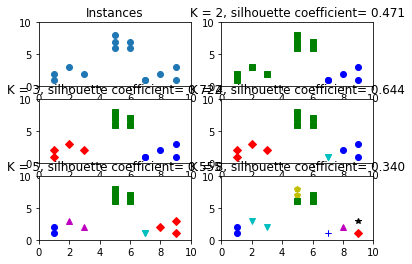

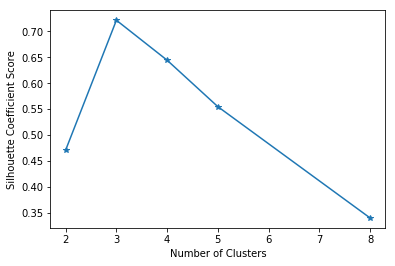

In [60]:
plt.subplot(3, 2, 1)

x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Instances')
plt.scatter(x1, x2)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']

clusters = [2, 3, 4, 5, 8]
subplot_counter = 1
sc_scores = []
for t in clusters:
    subplot_counter += 1
    plt.subplot(3, 2, subplot_counter)
    kmeans_model = KMeans(n_clusters=t).fit(X)
    for i, l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l], ls='None')
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    sc_score = silhouette_score(X, kmeans_model.labels_, metric='euclidean')
    sc_scores.append(sc_score)

    plt.title('K = %s, silhouette coefficient= %0.03f' %(t, sc_score))
    
plt.figure()
plt.plot(clusters, sc_scores, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')

plt.show()

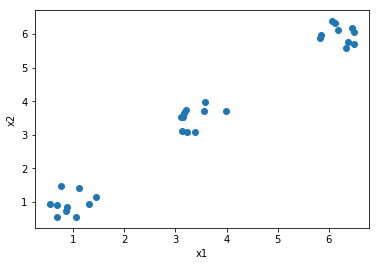

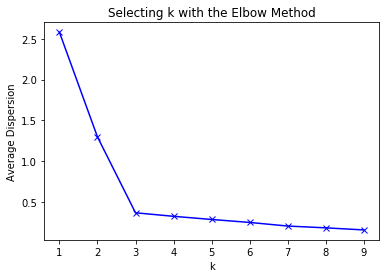

In [61]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

cluster1 = np.random.uniform(0.5, 1.5, (2, 10))
cluster2 = np.random.uniform(5.5, 6.5, (2, 10))
cluster3 = np.random.uniform(3.0, 4.0, (2, 10))

X = np.hstack((cluster1, cluster2, cluster3)).T
plt.scatter(X[:,0], X[:, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

K = range(1, 10)
meandistortions = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1))/X.shape[0])
    
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title('Selecting k with the Elbow Method')
plt.show()


## 特征降维

### 主成分分析（Principal Component Analysis）

In [63]:
import numpy as np
M = np.array([[1, 2], [2, 4]])
np.linalg.matrix_rank(M, tol=None)

1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


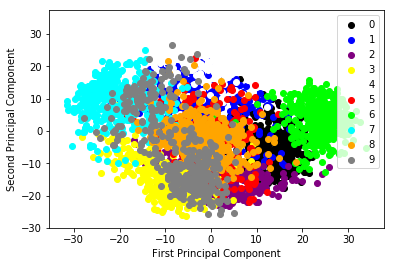

In [65]:
import pandas as pd

digits_train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra', header=None)
digits_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes', header=None)

X_digits = digits_train[np.arange(64)]
y_digits = digits_train[64]

from sklearn.decomposition import PCA

estimator = PCA(n_components=2)
X_pca = estimator.fit_transform(X_digits)

from matplotlib import pyplot as plt

def plot_pca_scatter():
    colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    for i in range(len(colors)):
        px = X_pca[:, 0][y_digits.as_matrix() == i]
        py = X_pca[:, 1][y_digits.as_matrix()== i]
        plt.scatter(px, py, c=colors[i])
    
    plt.legend(np.arange(0,10).astype(str))
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()
    
plot_pca_scatter()


In [66]:
X_train = digits_train[np.arange(64)]
y_train = digits_train[64]
X_test = digits_test[np.arange(64)]
y_test = digits_test[64]

from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)

estimator = PCA(n_components=20)

pca_X_train = estimator.fit_transform(X_train)
pca_X_test = estimator.transform(X_test)

pca_svc = LinearSVC()
pca_svc.fit(pca_X_train, y_train)
pca_y_predict = pca_svc.predict(pca_X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [67]:
from sklearn.metrics import classification_report

print(svc.score(X_test, y_test))
print(classification_report(y_test, y_predict, target_names=np.arange(10).astype(str)))

print(pca_svc.score(pca_X_test, y_test))
print(classification_report(y_test, pca_y_predict, target_names=np.arange(10).astype(str)))


0.9360044518642181
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       178
           1       0.90      0.88      0.89       182
           2       0.99      0.98      0.98       177
           3       0.95      0.92      0.94       183
           4       0.96      0.97      0.96       181
           5       0.89      0.97      0.93       182
           6       0.99      0.98      0.98       181
           7       0.98      0.91      0.94       179
           8       0.88      0.84      0.86       174
           9       0.85      0.93      0.89       180

   micro avg       0.94      0.94      0.94      1797
   macro avg       0.94      0.94      0.94      1797
weighted avg       0.94      0.94      0.94      1797

0.9232053422370617
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       178
           1       0.84      0.88      0.86       182
           2       0.99      0.98      0